### 1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

In [ ]:
2 tailed, 1 sample T-test

In [125]:
# difference not greater than

* Are adults who drink milk taller than adults who dont drink milk?

In [ ]:
1 tailed, 2 sample T-test

* Is the the price of gas higher in texas or in new mexico?

In [128]:
#1 tailed, 2 sample T-test # two states and checking for higher

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
ANOVA Analysis of Variance

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

In [199]:
#standard imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#stats module!!!!!
from scipy import stats

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
#set mean and sd
mean = 90
std = 15

In [3]:
sales_off_1_dist = stats.norm(mean, std)
sales_off_1_dist

In [4]:
sales_off_1 = pd.Series(sales_off_1_dist.rvs(40))

<Axes: ylabel='Frequency'>

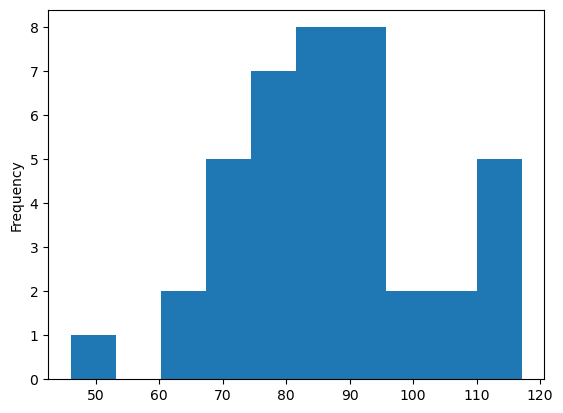

In [5]:
pd.Series(sales_off_1_dist.rvs(40)).plot.hist()

<Axes: ylabel='Frequency'>

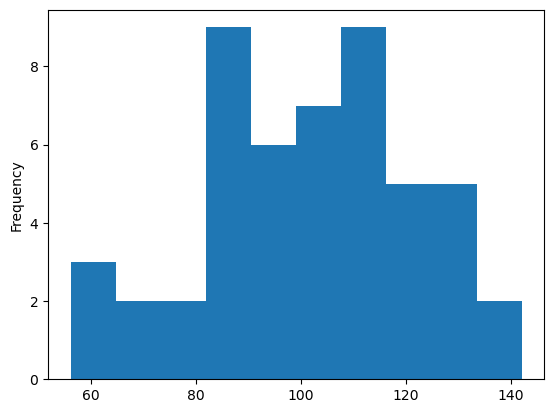

In [6]:
#set mean and sd
mean1 = 100
std1 = 20
sales_off_2_dist = stats.norm(mean1, std1)
pd.Series(sales_off_2_dist.rvs(50)).plot.hist()

In [7]:
sales_off_2 = pd.Series(sales_off_2_dist.rvs(40))

* H-o: Mean of average sales of homes in office 1 == Mean of average sales of homes in office 2

* H-a: Mean of average sales of homes in office 1 != Mean of average sales of homes in office 2|

In [104]:
alpha = .05

In [14]:
mean_a = sales_off_1.mean()
mean_b = sales_off_2.mean()
mean_a, mean_b

(88.28710548731763, 100.45964498448919)

In [15]:
# tests ewaul variance
stat, pval = stats.levene(sales_off_1, sales_off_2)
pval

0.1972407603831767

In [16]:
t, p = stats.ttest_ind(sales_off_1, sales_off_2, equal_var=True)
t, p

(-2.958252086701319, 0.004093905412622125)

In [17]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


### 3. Load the mpg dataset and use it to answer the following questions:

In [200]:
from pydataset import data
import pydataset
from env import get_db_url

In [32]:
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [138]:
mpg_df['avg_fuel_eff'] = 2/((1/mpg_df.cty)+(1/mpg_df.hwy)) # ,<<<<< harmonic rates = 2/(1/hxy + 1/cty)
mpg_df.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [139]:
_1999_df = mpg_df[(mpg_df.year == 1999)]
_1999_mean =  _1999_df['avg_fuel_eff'].mean()

In [140]:
len(_1999_df)

117

In [141]:
_2008_df = mpg_df[(mpg_df.year == 2008)]
_2008_mean =  _2008_df['avg_fuel_eff'].mean()

In [142]:
len(_2008_df)

117

In [143]:
_2008_std =  _2008_df['avg_fuel_eff'].std()

In [144]:
_1999_std =  _1999_df['avg_fuel_eff'].std()

<Axes: ylabel='Frequency'>

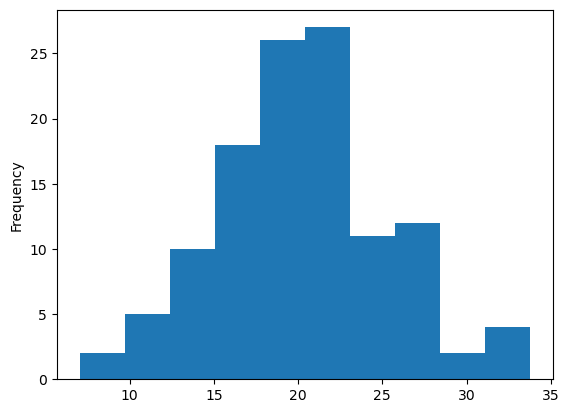

In [145]:
_1999_fuel_dist = stats.norm(_1999_mean, _1999_std)
pd.Series(_1999_fuel_dist.rvs(117)).plot.hist()

In [146]:
_1999_fuel = pd.Series(_1999_fuel_dist.rvs(117))

<Axes: ylabel='Frequency'>

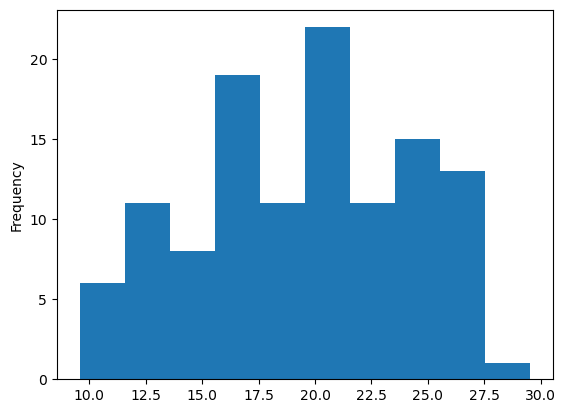

In [147]:
_2008_fuel_dist = stats.norm(_2008_mean, _2008_std)
pd.Series(_2008_fuel_dist.rvs(117)).plot.hist()

In [148]:
_2008_fuel = pd.Series(_2008_fuel_dist.rvs(117))

* H-o: Mean of average fuel efficiency of car in 1999 <= Mean of average fuel efficiency of car in 2008

* H-a: Mean of average fuel efficiency of car in 2008 > Mean of average fuel efficiency of car in 2008


In [149]:
stat, pval = stats.levene(_1999_fuel, _2008_fuel)
pval

0.3057579699862588

In [150]:
t, p = stats.ttest_ind(_1999_fuel, _2008_fuel, equal_var=True)
t, p

(0.5192011677190441, 0.6041154043516631)

In [151]:
if (p > alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


* Are compact cars more fuel-efficient than the average car?

In [152]:
compact_df = mpg_df[(mpg_df['class'] == 'compact')]
compact_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [153]:
len(mpg_df)

234

In [154]:
len(compact_df)

47

In [155]:
compact = mpg_df[(mpg_df['class'] == 'compact')]
compact_mean =  compact['avg_fuel_eff'].mean()

average_mean =  mpg_df['avg_fuel_eff'].mean()

In [156]:
compact_std =  compact['avg_fuel_eff'].std()

average_std =  mpg_df['avg_fuel_eff'].std()

<Axes: ylabel='Frequency'>

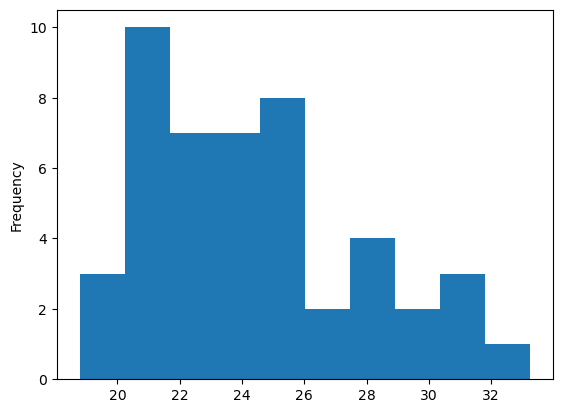

In [157]:
compact_dist = stats.norm(compact_mean, compact_std)
pd.Series(compact_dist.rvs(47)).plot.hist()

In [158]:
compact_f = pd.Series(compact_dist.rvs(47))

<Axes: ylabel='Frequency'>

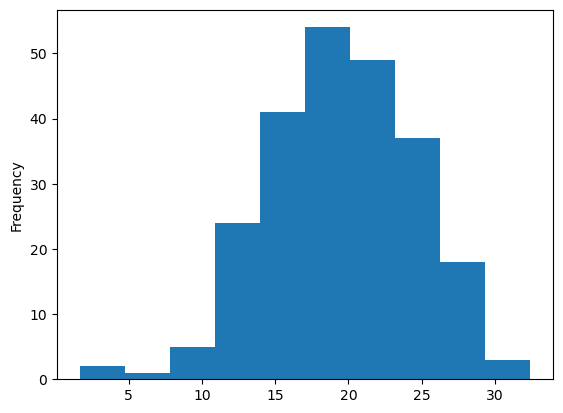

In [159]:
average_dist = stats.norm(average_mean, average_std)
pd.Series(average_dist.rvs(234)).plot.hist()

In [160]:
average_f = pd.Series(average_dist.rvs(234)).sum()

* H-o: Mean of average fuel efficiency of compact cars >= Mean of average fuel efficiency of the average car

* H-a: Mean of average fuel efficiency of compact cars < Mean of average fuel efficiency of the average car


In [161]:
compact_f.head()

0    23.946196
1    24.637213
2    28.050896
3    25.158728
4    28.405545
dtype: float64

In [162]:
average_f_mean = average_f.mean()

In [163]:
t, p = stats.ttest_1samp(compact.avg_fuel_eff, mpg_df.avg_fuel_eff.mean())
t, p

(7.512360093161361, 1.5617666348807277e-09)

In [195]:
if ((p / 2) < alpha) and (t > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


* Do manual cars get better gas mileage than automatic cars?

In [173]:
auto_df = mpg_df[mpg_df.trans.str.contains('auto')]
auto_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,21.600000
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,19.512195


In [172]:
manual_df = mpg_df[mpg_df.trans.str.contains('manual')]
manual_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_eff
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,21.272727
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,21.272727
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,23.333333


In [169]:
manual_df.avg_fuel_eff.mean()

21.629228592155208

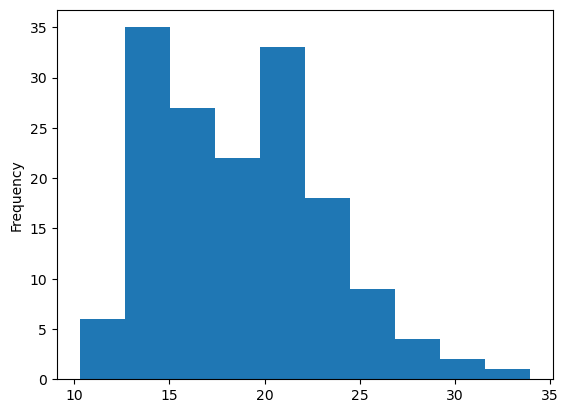

In [184]:
# auto_dist = stats.norm(auto_df.avg_fuel_eff.mean(), auto_df.avg_fuel_eff.std())
auto_dist = pd.Series(auto_df.avg_fuel_eff).plot.hist()

<Axes: ylabel='Frequency'>

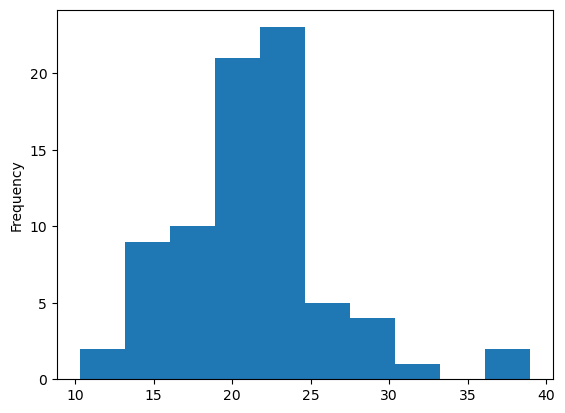

In [182]:
# manual_dist = stats.norm(manual_df.avg_fuel_eff.mean(), manual_df.avg_fuel_eff.std())
manual_dist = pd.Series(manual_df.avg_fuel_eff).plot.hist()

In [190]:
stat, pval = stats.levene(auto_df.avg_fuel_eff, manual_df.avg_fuel_eff)
pval

0.9062462281015493

In [194]:
t, p = stats.ttest_ind(auto_df.avg_fuel_eff, manual_df.avg_fuel_eff, equal_var=True)
t, p

(-4.652577547151351, 5.510464610044009e-06)

In [196]:
if p > alpha:
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


# Correlation

In [201]:
import pydataset
from pydataset import data
import pandas as pd
import numpy as np

### 1. Answer with the type of stats test you would use (assume normal distribution):

* Is there a relationship between the length of your arm and the length of your foot?

In [ ]:
Pearsons

* Do guys and gals quit their jobs at the same rate?

In [ ]:
Chi-Squared

* Does the length of time of the lecture correlate with a students grade?

In [ ]:
Pearsons

### 2. Use the ```telco_churn``` data.

In [202]:
from env import get_db_url

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats

In [69]:
url = get_db_url('telco_churn')
cust_churn = pd.read_sql('''SELECT * FROM customer_churn''', url)
url = get_db_url('telco_churn')
cust_pay = pd.read_sql('''SELECT * FROM customer_payments''', url)
url = get_db_url('telco_churn')
cust_tenure = pd.read_sql('''SELECT * FROM customers''', url)

In [25]:
cust_pay.head()

,customer_id,payment_type_id,monthly_charges,total_charges
0,0002-ORFBO,2,65.6,593.3
1,0003-MKNFE,2,59.9,542.4
2,0004-TLHLJ,1,73.9,280.85
3,0011-IGKFF,1,98.0,1237.85
4,0013-EXCHZ,2,83.9,267.4


In [28]:
cust_tenure.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [70]:
url = get_db_url('telco_churn')
data = pd.read_sql('''SELECT c.customer_id, c.tenure, cp.monthly_charges
                                FROM customers as c
                                JOIN customer_payments as cp USING (customer_id)
                                ''', url)

* Does tenure correlate with monthly charges?

H-o: There is no linear relationship between tenure and monthly charges.


H-a: There is a linear relationship between tenure and monthly charges.

In [71]:
data.head()

,customer_id,tenure,monthly_charges
0,0002-ORFBO,9,65.6
1,0003-MKNFE,9,59.9
2,0004-TLHLJ,4,73.9
3,0011-IGKFF,13,98.0
4,0013-EXCHZ,3,83.9


In [72]:
alpha = 0.05

In [73]:
corr, p = stats.pearsonr(data.tenure, data.monthly_charges)
corr, p

(0.24789985628615246, 4.094044991483017e-99)

In [74]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


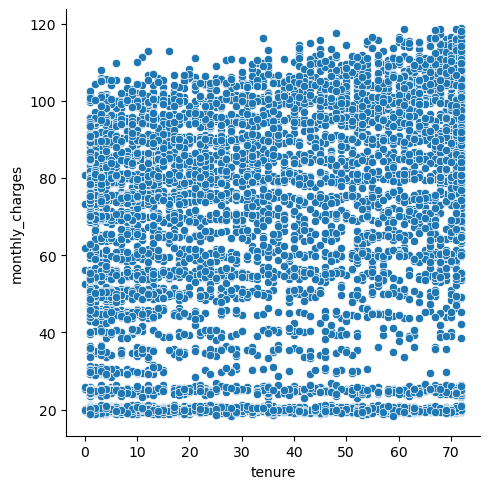

In [45]:
sns.relplot(data=data, x='tenure', y='monthly_charges')
plt.show()

r = 0.24789985628615246
p = 4.094044991483017e-99


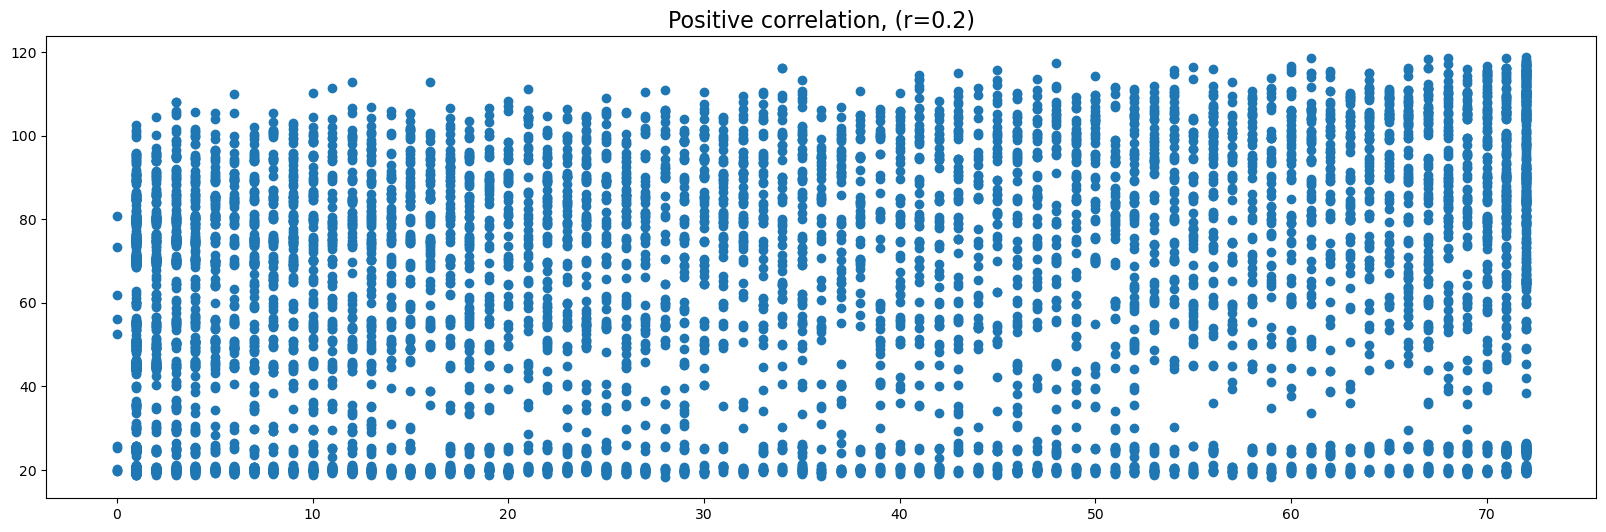

In [46]:
x = data.tenure
y = data.monthly_charges

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

plt.figure(figsize=(20, 6))
plt.scatter(x, y)
plt.title(f'Positive correlation, (r={round(r,1)})', size=16)
plt.show()

* Total charges?

H-o: There is no linear correlation between tenure and total charges.


H-a: There is a linear correlation between tenure and total charges.

In [18]:
url = get_db_url('telco_churn')
data_w_tot_charges = pd.read_sql('''SELECT c.customer_id, c.tenure, cp.total_charges
                                FROM customers as c
                                JOIN customer_payments as cp USING (customer_id)
                                ''', url)

In [19]:
data_w_tot_charges = data_w_tot_charges[data_w_tot_charges.total_charges != " "]
pd.to_numeric(data_w_tot_charges.total_charges)


0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7032, dtype: float64

In [20]:
data_w_tot_charges.dtypes

customer_id      object
tenure            int64
total_charges    object
dtype: object

In [21]:
data_w_tot_charges.total_charges = data_w_tot_charges.total_charges.astype(float)

In [24]:
corr, p = stats.pearsonr(data_w_tot_charges.tenure, data_w_tot_charges.total_charges)
corr, p

(0.8258804609332071, 0.0)

In [25]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


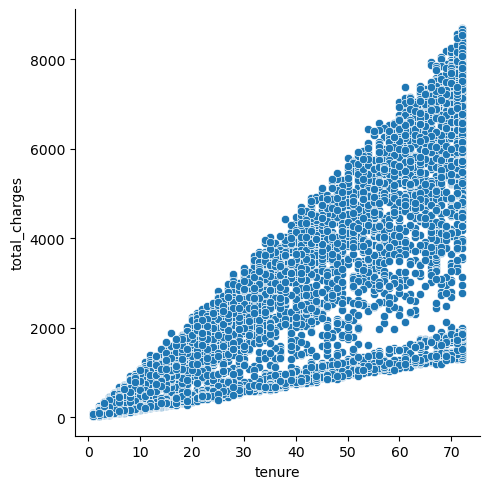

In [164]:
sns.relplot(data=data_w_tot_charges, x='tenure', y='total_charges', hue='interent_service_type_id')
plt.show()

## * What happens if you control for phone and internet service?

### Phone Service

H-o: There is no linear relationship between tenure and monthly charges with phone control.


H-a: There is a linear relationship between tenure and total charges with phone control.

In [76]:
url = get_db_url('telco_churn')
telco_df = pd.read_sql('''SELECT * FROM customers
                                ''', url)

In [170]:
telco_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes


In [79]:
#look at our handedness options
telco_df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

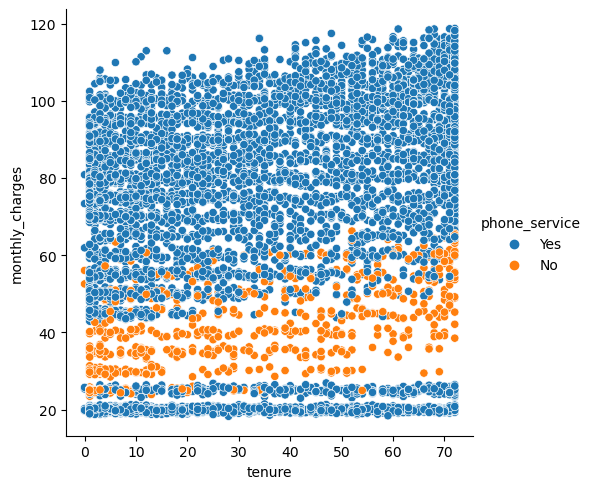

In [165]:
sns.relplot(data=telco_df, x='tenure', y='monthly_charges', hue='phone_service')
plt.show()

In [85]:
#create separate dfs for left and right handedness
yes_phone = telco_df[telco_df.phone_service == 'Yes'] 
no_phone = telco_df[telco_df.phone_service == 'No'] 

In [86]:
yes_phone

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9986-BONCE,Female,0,No,No,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,3,20.95,85.5,Yes
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No


In [166]:
r, p = stats.pearsonr(yes_phone.tenure, yes_phone.monthly_charges)

print('With Phone Service')
print('  r =', r)
print('  p =', p)

With Phone Service
  r = 0.24538898585363147
  p = 7.117871077934896e-88


In [167]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [168]:
r, p = stats.pearsonr(no_phone.tenure, no_phone.monthly_charges)

print('Without Phone Service')
print('  r =', r)
print('  p =', p)

Without Phone Service
  r = 0.5857597986661369
  p = 4.6033703473420516e-64


In [169]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Internet Service

H-o: There is no linear relationship between tenure and monthly charges with internet control.


H-a: There is a linear relationship between tenure and total charges with internet control.

In [ ]:
#look at our handedness options
telco_df.phone_service.value_counts()

### 3. Use the employees database.

In [4]:
import datetime

In [314]:
current_time = datetime.datetime.now()
#current_time = current_time.strftime("%Y-%m-%d")

current_time = current_time.date()

In [315]:
current_time

datetime.date(2023, 6, 2)

In [448]:
url = get_db_url('employees')

### * Is there a relationship between how long an employee has been with the company and their salary?

### Company and Salary

H-o: There is no linear relationship between tenure at company and their salary.


H-a: There is a linear relationship between tenure at company and their salary.

In [376]:
salaries_df = pd.read_sql('''SELECT e.emp_no, e.hire_date, s.salary, datediff(curdate(), hire_date) as difference
                            FROM salaries as s
                            JOIN employees AS e USING (emp_no)
                            WHERE to_date > curdate();
                            ''', url)

In [379]:
salaries_df.head()

,emp_no,hire_date,salary,difference
0,10001,1986-06-26,88958,13490
1,10002,1985-11-21,72527,13707
2,10003,1986-08-28,43311,13427
3,10004,1986-12-01,74057,13332
4,10005,1989-09-12,94692,12316


In [300]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


In [337]:
#salaries_df.loc[salaries_df['to_date'] == pd.to_datetime('9999-01-01', errors='coerce'), 'to_date'] = current_time

#salaries_df['to_date'] = salaries_df['to_date'].fillna(current_time)

In [321]:
#salaries_df['to_date'] = salaries_df['to_date'].fillna(current_time)

In [115]:
#salaries_df['to_date'] = salaries_df['to_date'].astype('str')

In [91]:
#salaries_df['to_date'] = pd.to_datetime(salaries_df.to_date, format='%Y-%m-%d')

In [324]:
#salaries_df['to_date'] = salaries_df['to_date'].replace(pd.to_datetime('9999-01-01'), current_time)

In [325]:
#salaries_df['to_date'] = salaries_df['to_date'].replace('9999-01-01', current_time)

In [326]:
#salaries_df['to_date'] = salaries_df['to_date'].replace(pd.datetime('9999-01-01'), current_time)

In [253]:
#salaries_df = salaries_df[salaries_df.to_date > current_time]

* subtracting the dates to get the time at company

In [373]:
#salaries_df['difference'] = (current_time - salaries_df.hire_date).dt.days

In [380]:
aggregations = {'difference': 'max', 'salary': 'max'} # create a dictionary to aggregate 
df = salaries_df.groupby('emp_no').agg(aggregations)

 Length of `df`

In [424]:
len(df)

240124

In [425]:
df.head()

,difference,salary
emp_no,,
10001,13490,88958
10002,13707,72527
10003,13427,43311
10004,13332,74057
10005,12316,94692


In [383]:
corr, p = stats.pearsonr(df.difference, df.salary)
corr, p

(0.3064625613186014, 0.0)

In [384]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [422]:
titles_df = pd.read_sql('''SELECT COUNT(t.title) as title_count, e.emp_no, MAX(s.salary) as salary
                            FROM titles as t
                            JOIN employees as e USING (emp_no)
                            JOIN salaries as s USING (emp_no)
                            WHERE t.to_date > CURDATE()
                            GROUP BY e.emp_no;
                            ''', url)

Length of `titles_df`

In [423]:
len(titles_df)

240124

In [427]:
titles_df.head()

,title_count,emp_no,salary
0,17,10001,88958
1,6,10002,72527
2,7,10003,43699
3,16,10004,74057
4,13,10005,94692


In [428]:
corr, p = stats.pearsonr(titles_df.title_count, titles_df.salary)
corr, p

(0.5025660158190319, 0.0)

(300024, 443308)

Use the sleepstudy data.

In [41]:
sleep_df = data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Is there a relationship between days and reaction time?

In [44]:
len(sleep_df)

180

In [43]:
corr, p = stats.pearsonr(sleep_df.Reaction, sleep_df.Days)
corr, p

(0.5352302262650255, 9.89409632221439e-15)

In [45]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Comparioson of Groups

### 1. Answer with the type of stats test you would use (assume normal distribution):

* Do students get better test grades if they have a rubber duck on their desk?

In [ ]:
#better grade

* Does smoking affect when or not someone has lung cancer?

In [ ]:
Chi-squared # discrete vs discrete 

* Is gender independent of a person’s blood type?

In [ ]:
Chi-squaed # gender is catagorical and so is bloodtype

* A farming company wants to know if a new fertilizer has improved crop yield or not

In [ ]:
one tailed , two sampled t test

* Does the length of time of the lecture correlate with a students grade?

In [ ]:
Pearsons

* Do people with dogs live in apartments more than people with cats?

In [ ]:
Chi-squared # categorical vs categorical 

In [1]:
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np

### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

      Codeup Student    Not Codeup  Student
        Uses a Macbook       49       20       	
     Doesn't use Macbook     13       30

In [46]:
# data1 = ['uses_a_macbook', 49, 13]
# data2 = ['doesnt_use_macbook', 20, 30]
data1 = [49, 13]
data2 = [20, 30]
index = ["Uses Macbook", "Doesn't Macbook"]

In [47]:
#observed = pd.DataFrame([data1, data2], columns=['codeup_student', 'not_codeup', 'student'])
observed = pd.DataFrame([data1, data2], columns=['not_codeup', 'student'], index=index)

In [48]:
observed

,not_codeup,student
Uses Macbook,49,13
Doesn't Macbook,20,30


In [297]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=16.216248844819898, pvalue=5.650735270316584e-05, dof=1, expected_freq=array([[38.19642857, 23.80357143],
       [30.80357143, 19.19642857]]))

In [436]:
alpha = .05

In [439]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(16.216248844819898,
 5.650735270316584e-05,
 1,
 array([[38.19642857, 23.80357143],
        [30.80357143, 19.19642857]]))

In [440]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### 3. Choose another 2 categorical variables from the mpg dataset and perform a `chi2` contingency table test with them. Be sure to state your null and alternative hypotheses.

In [2]:
from pydataset import data

In [445]:
df= data('mpg')

df = df.rename(columns={"class": "vehicle_type"})

df['is_automatic'] = df.trans.str.startswith('a')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_type,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True


In [446]:
observed = pd.crosstab(df.vehicle_type, df.is_automatic)

chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(33.7700251570052,
 7.4513729838250925e-06,
 6,
 array([[ 1.64529915,  3.35470085],
        [15.46581197, 31.53418803],
        [13.49145299, 27.50854701],
        [ 3.61965812,  7.38034188],
        [10.85897436, 22.14102564],
        [11.51709402, 23.48290598],
        [20.4017094 , 41.5982906 ]]))

In [447]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### 4. Use the data from the employees database to answer these questions:

In [5]:
from env import get_db_url

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [8]:
url = get_db_url('employees')

In [11]:
df = pd.read_sql('''SELECT e.gender, d.dept_name
                    FROM employees as e
                    JOIN dept_emp as de USING (emp_no)
                    JOIN departments as d USING (dept_no)
                    WHERE to_date > CURDATE()
                    AND d.dept_name IN ('Sales', 'Marketing');
                            ''', url)

In [13]:
df.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [15]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [17]:
chi, p, degf, expected = stats.chi2_contingency(observed)
chi, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [19]:
alpha = 0.5

In [21]:
chi, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


* Is an employee's gender independent of whether or not they are or have been a manager?

In [31]:
df = pd.read_sql('''SELECT e.gender, t.title, 
                    (
                    CASE 
                        WHEN t.title = 'Manager' 
                        THEN TRUE 
                        ELSE FALSE 
                        END
                        ) AS is_manager
                    FROM employees as e
                    JOIN titles as t USING (emp_no);
                    ''', url)

In [34]:
df.head()

,gender,title,is_manager
0,M,Senior Engineer,0
1,F,Staff,0
2,M,Senior Engineer,0
3,M,Engineer,0
4,M,Senior Engineer,0


In [35]:
observed = pd.crosstab(df.gender, df.is_manager)
observed

is_manager,0,1
gender,,
F,177211,13
M,266073,11


In [36]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(1.4658352730039057,
 0.22600394509880642,
 1,
 array([[1.77214405e+05, 9.59462947e+00],
        [2.66069595e+05, 1.44053705e+01]]))

In [37]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
